In [1]:
import gym

from multiprocessing import Pool

import random

from collections import defaultdict

import numpy as np

from time import sleep

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.


In [2]:
env = gym.make('Blackjack-v0', natural=True)

In [28]:
def play_simple_strategy(env):
    state = env.reset()
    
    done = False
    while not done:
        action = 0 if state[0] > 18 else 0
        state, reward, done, info = env.step(action)
        
    return reward

In [95]:
%%time

total = 0
for _ in range(1_000_000):
    total += play_simple_strategy(env)
total / 1_000_000

CPU times: user 57.3 s, sys: 64.5 ms, total: 57.4 s
Wall time: 57.5 s


-0.165719

In [94]:
%%time
with Pool(4) as p:
    res = p.map(play_simple_strategy, [env] * 1_000_000, chunksize=10000)
print(sum(res) / 1_000_000)

-0.1867
CPU times: user 134 ms, sys: 34.1 ms, total: 168 ms
Wall time: 15 s


# Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.

In [97]:
env = gym.make('Blackjack-v0', natural=True)

In [209]:
q_table = defaultdict(lambda : [0, 0])


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
rewards = []

for i in range(1, 1000001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value

        
        state = next_state
        
    rewards.append(reward)
        
    if i % 50000 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        plt.figure()
        pd.Series(rewards).rolling(50000).mean().plot()
        plt.show()
        sleep(1)

print("Training finished.\n")

In [229]:
np.mean(rewards[:50_000]), np.mean(rewards[-50_000:])

(-0.1351, -0.1276)

# Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.

In [234]:
rewards_global = []
for alpha in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
#     alpha = 0.1
    gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


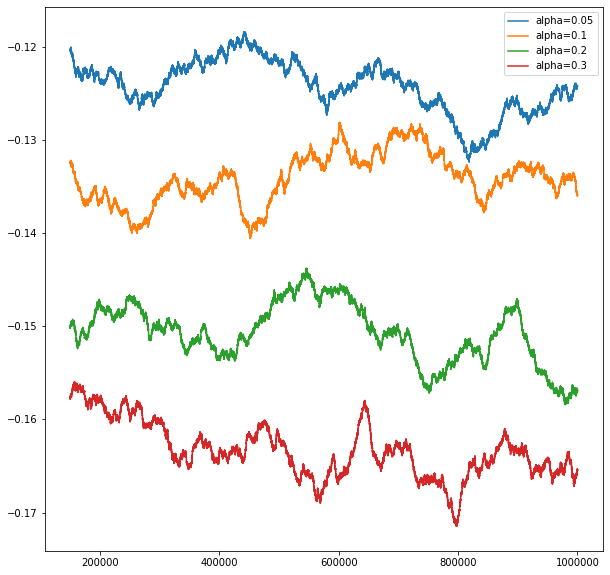

In [238]:
plt.figure(figsize=(10,10))
for i, alpha in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='alpha={}'.format(alpha))
plt.legend()

In [239]:
rewards_global = []
for gamma in [0.1,0.2,0.4,0.6,0.8]:

    q_table = defaultdict(lambda : [0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
#     gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


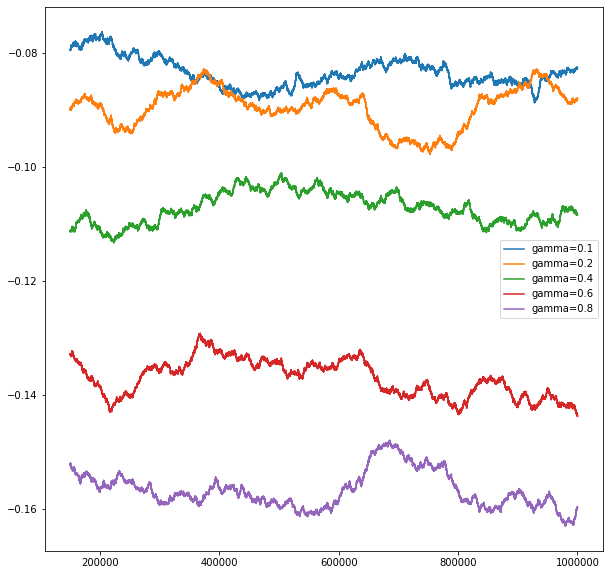

In [240]:
plt.figure(figsize=(10,10))
for i, gamma in enumerate([0.1,0.2,0.4,0.6,0.8]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='gamma={}'.format(gamma))
plt.legend()

In [241]:
rewards_global = []
for epsilon in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
    gamma = 0.6
#     epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


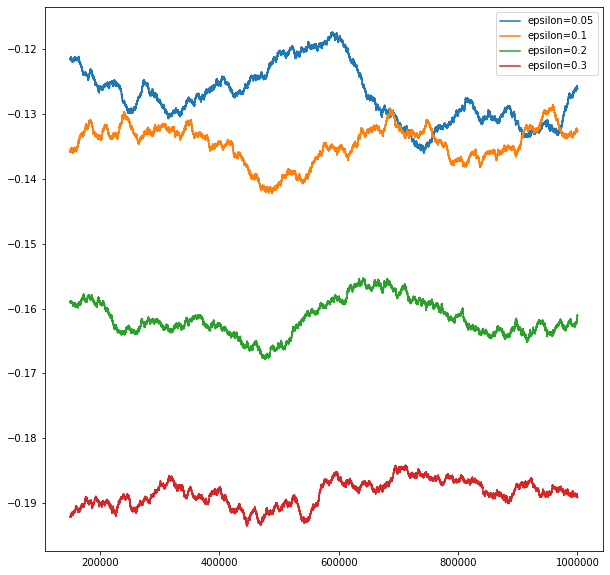

In [242]:
plt.figure(figsize=(10,10))
for i, epsilon in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='epsilon={}'.format(epsilon))
plt.legend()

In [ ]:
# use best params

In [244]:
q_table = defaultdict(lambda : [0, 0])


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.05
gamma = 0.01
epsilon = 0.05

# For plotting metrics
rewards = []

for i in range(1, 1000001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value


        state = next_state

    rewards.append(reward)


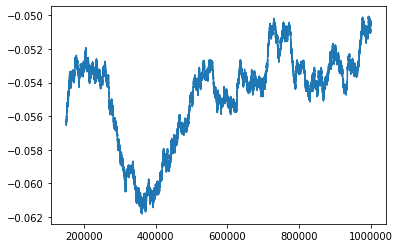

In [245]:
pd.Series(rewards).rolling(150_000).mean().plot()

# double — удвоить ставку; при этом больше действий делать нельзя, игроку выдаётся ровно одна дополнительная карта, а выигрыш или проигрыш удваивается. Реализуйте новый вариант блекджека на основе окружения Blackjack-v0 из OpenAI Gym, в котором разрешено удвоение ставки.


In [243]:
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnvDouble(gym.Env):
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 0:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        elif action == 1:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
        else: # double: double reward and draw one card
            done = True
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                reward = -1
            else:
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(draw_card(self.np_random))
                reward = cmp(score(self.player), score(self.dealer))
                if self.natural and is_natural(self.player) and reward == 1.:
                    reward = 1.5
                
            reward *= 2
            
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

In [246]:
env = BlackjackEnvDouble()

# Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.


In [248]:
rewards_global = []
for alpha in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
#     alpha = 0.1
    gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


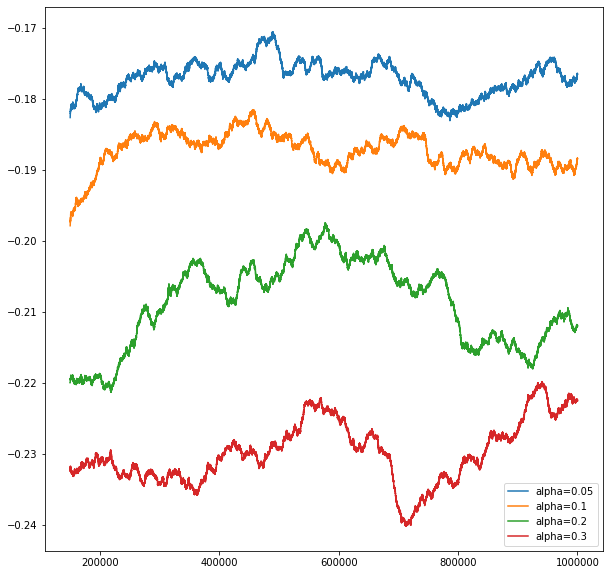

In [249]:
plt.figure(figsize=(10,10))
for i, alpha in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='alpha={}'.format(alpha))
plt.legend()

In [250]:
rewards_global = []
for gamma in [0.1,0.2,0.4,0.6,0.8]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
#     gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


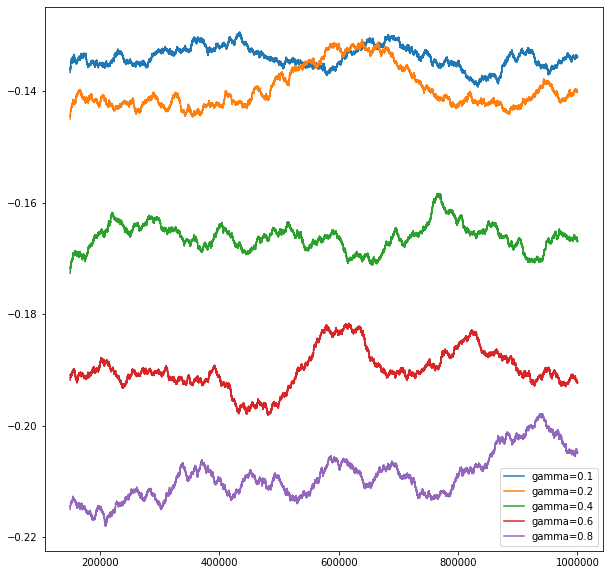

In [251]:
plt.figure(figsize=(10,10))
for i, gamma in enumerate([0.1,0.2,0.4,0.6,0.8]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='gamma={}'.format(gamma))
plt.legend()

In [252]:
rewards_global = []
for epsilon in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
    gamma = 0.6
#     epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


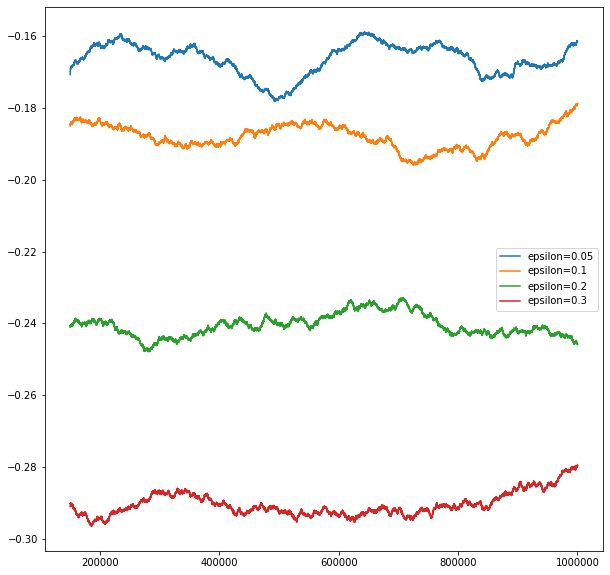

In [253]:
plt.figure(figsize=(10,10))
for i, epsilon in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='epsilon={}'.format(epsilon))
plt.legend()

In [254]:
# use best params

In [255]:
q_table = defaultdict(lambda : [0, 0, 0])


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.05
gamma = 0.01
epsilon = 0.05

# For plotting metrics
rewards = []

for i in range(1, 1000001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value


        state = next_state

    rewards.append(reward)


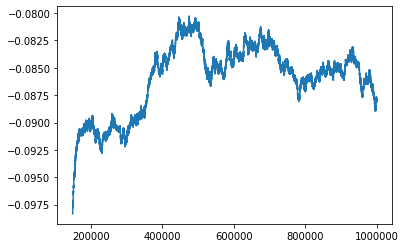

In [256]:
pd.Series(rewards).rolling(150_000).mean().plot()

# Реализуйте вариант окружения Blackjack-v0 из предыдущей части (с удвоением), в котором игрок имеет возможность “считать карты” в колоде. Это можно сделать разными способами; возможно, вам поможет статья википедии о блекджеке (а возможно, и нет).

In [2]:
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnvDoubleCounting(gym.Env):
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2),
            spaces.Discrete(13*4*6)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        
        self.card_value_mapping = {
            2: 1,
            3: 1,
            4: 1,
            5: 1,
            6: 1,
            7: 0,
            8: 0,
            9: 0,
            10: -1,
            1: -1
        }
        
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def draw_card(self):
        card = self.game_deck[0]
        self.game_deck = self.game_deck[1:]
        return card
    
    def draw_hand(self):
        
        return [self.draw_card(), self.draw_card()]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 0:  # hit: add a card to players hand and return
            self.player.append(self.draw_card())
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        elif action == 1:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(self.draw_card())
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
        else: # double: double reward and draw one card
            done = True
            self.player.append(self.draw_card())
            if is_bust(self.player):
                reward = -1
            else:
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(self.draw_card())
                reward = cmp(score(self.player), score(self.dealer))
                if self.natural and is_natural(self.player) and reward == 1.:
                    reward = 1.5
                
            reward *= 2
            
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        count = sum([self.card_value_mapping[card] for card in self.game_deck])
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player), count)

    def reset(self):
        self.game_deck = deck * 6 * 4
        random.shuffle(self.game_deck)
        self.game_deck = self.game_deck[random.randint(0, 150):]
        
        self.dealer = self.draw_hand()
        self.player = self.draw_hand()
        
        return self._get_obs()

In [3]:
env = BlackjackEnvDoubleCounting()

# Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.

In [272]:
rewards_global = []
for alpha in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
#     alpha = 0.1
    gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


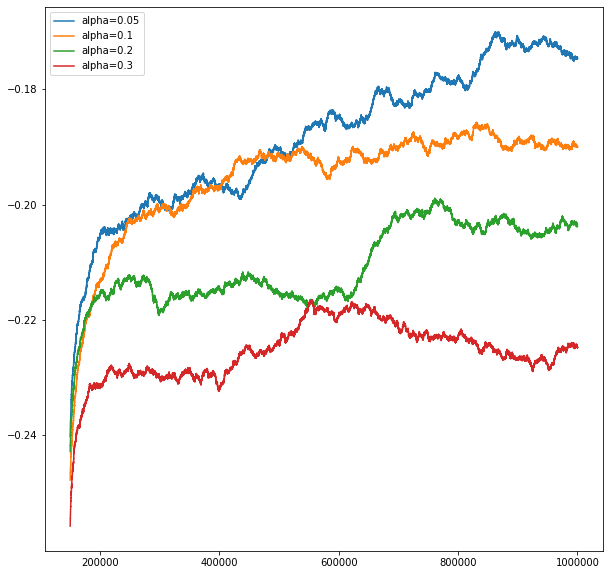

In [273]:
plt.figure(figsize=(10,10))
for i, alpha in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='alpha={}'.format(alpha))
plt.legend()

In [274]:
rewards_global = []
for gamma in [0.1,0.2,0.4,0.6,0.8]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
#     gamma = 0.6
    epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


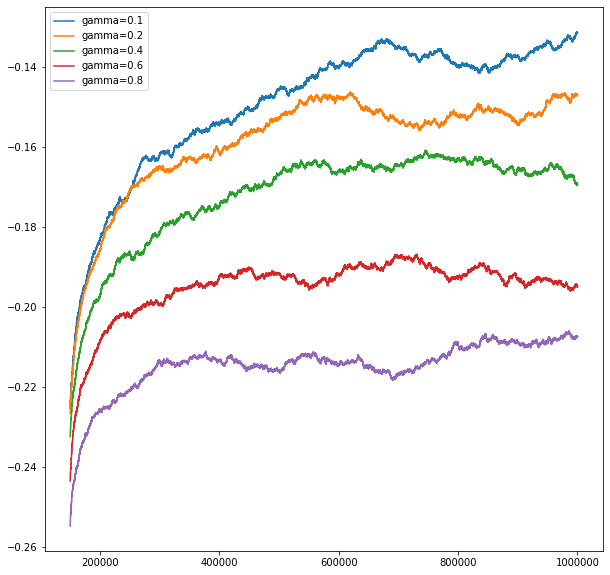

In [275]:
plt.figure(figsize=(10,10))
for i, gamma in enumerate([0.1,0.2,0.4,0.6,0.8]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='gamma={}'.format(gamma))
plt.legend()

In [276]:
rewards_global = []
for epsilon in [0.05, 0.1, 0.2, 0.3]:

    q_table = defaultdict(lambda : [0, 0, 0])


    import random
    from IPython.display import clear_output

    # Hyperparameters
    alpha = 0.1
    gamma = 0.6
#     epsilon = 0.1

    # For plotting metrics
    rewards = []

    for i in range(1, 1000001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value


            state = next_state

        rewards.append(reward)
    rewards_global.append(rewards[::])

/Library/Python/3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


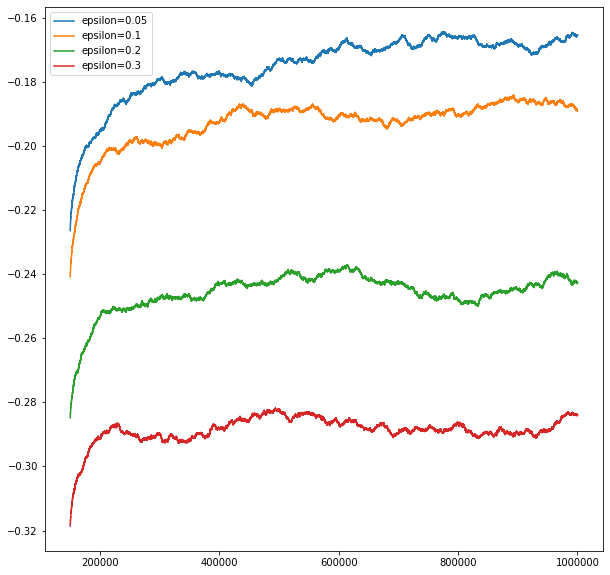

In [277]:
plt.figure(figsize=(10,10))
for i, epsilon in enumerate([0.05, 0.1, 0.2, 0.3]):
    pd.Series(rewards_global[i]).rolling(150_000).mean().plot(ax=plt.gca(), label='epsilon={}'.format(epsilon))
plt.legend()

In [278]:
# use best params

In [4]:
q_table = defaultdict(lambda : [0, 0, 0])


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.05
gamma = 0.01
epsilon = 0.05

# For plotting metrics
rewards = []

for i in range(1, 2000001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 

        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value


        state = next_state

    rewards.append(reward)


KeyboardInterrupt: 

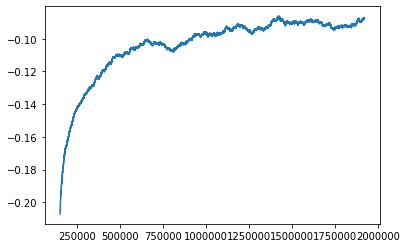

In [6]:
pd.Series(rewards).rolling(150_000).mean().plot()